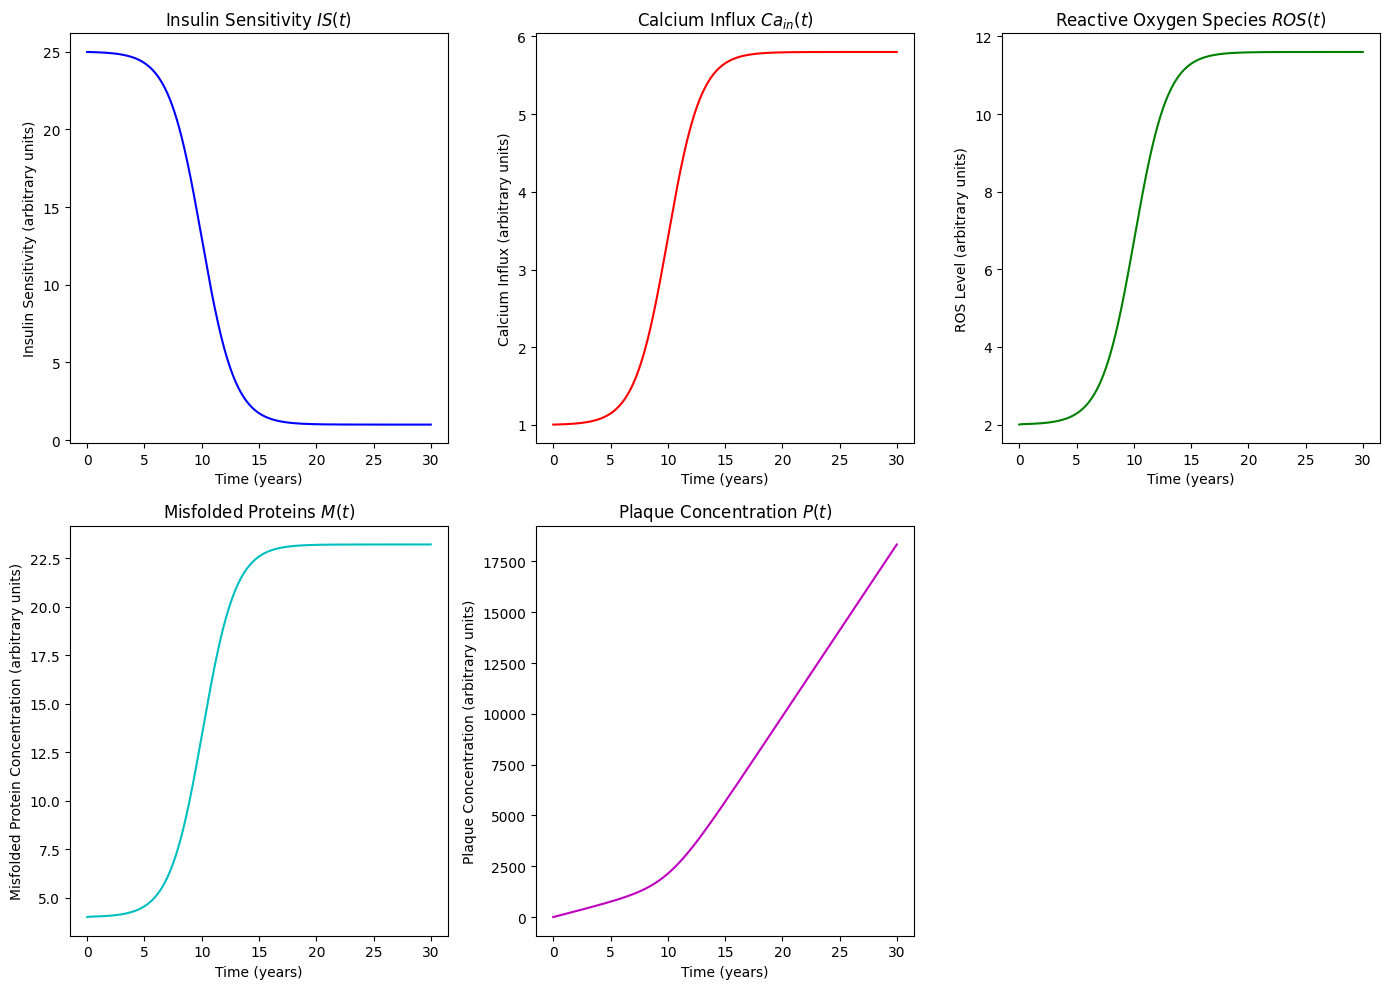

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the insulin sensitivity function
def IS_function(t, IS_min, IS_max, k, t_m):
    return IS_min + (IS_max - IS_min) / (1 + np.exp(k * (t - t_m)))

# Define the system of ODEs
def derivatives(state, t, params):
    ROS, M, P = state
    IS_min, IS_max, k, t_m, G0, Ca0, k2, k3, k4, k5, k6, k7, k8 = params

    # Compute IS(t) using the inverted logistic function
    IS = IS_function(t, IS_min, IS_max, k, t_m)
    # Compute G(t)
    G = G0 * IS
    # Compute Ca_in(t)
    Ca_in = Ca0 + k2 * (1 - IS / IS_max)  # Adjusted for scaling

    # Compute derivatives
    dROS_dt = k3 * Ca_in - k4 * ROS
    dM_dt = k5 * ROS - k6 * M
    dP_dt = k7 * M - k8 * P

    return [dROS_dt, dM_dt, dP_dt]

# Parameters
IS_min = 1.0        # Minimum insulin sensitivity
IS_max = 25.0       # Maximum insulin sensitivity at t = 0
t_m = 912.5*4         # Midpoint time in days
k = np.log(999) / t_m  # Steepness parameter

G0 = 1.0            # Maximum glucose uptake
Ca0 = 1.0           # Basal calcium influx
k2 = 5.0            # Rate constant for calcium influx increase
k3 = 0.1            # Rate constant for ROS production per unit calcium influx
k4 = 0.05           # Rate constant for ROS clearance
k5 = 0.2            # Rate constant for misfolded protein formation per unit ROS
k6 = 0.1            # Rate constant for misfolded protein clearance
k7 = 0.1            # Rate constant for plaque formation per unit misfolded protein
k8 = 0.0            # Rate constant for plaque clearance (set to zero)

params = [IS_min, IS_max, k, t_m, G0, Ca0, k2, k3, k4, k5, k6, k7, k8]

# Initial conditions
ROS0 = k3* Ca0/ k4     # Initial ROS level
M0 = k5/k6* ROS0       # Initial misfolded protein concentration
P0 = 0.0               # Initial plaque concentration
state0 = [ROS0, M0, P0]

# Time points (e.g., over 30 years)
t_days = np.linspace(0, 30*365, 30*365)  # Simulate over 30 years (30*365 days)

# Integrate the ODEs
sol = odeint(derivatives, state0, t_days, args=(params,))

# Extract the results
ROS = sol[:, 0]
M = sol[:, 1]
P = sol[:, 2]

# Compute IS(t), G(t), Ca_in(t) for plotting
IS = IS_function(t_days, IS_min, IS_max, k, t_m)
G = G0 * IS
Ca_in = Ca0 + k2 * (1 - IS / IS_max)

# Convert time to years for plotting
t_years = t_days / 365.25

# Plot the results
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.plot(t_years, IS, 'b')
plt.title('Insulin Sensitivity $IS(t)$')
plt.xlabel('Time (years)')
plt.ylabel('Insulin Sensitivity (arbitrary units)')

plt.subplot(2, 3, 2)
plt.plot(t_years, Ca_in, 'r')
plt.title('Calcium Influx $Ca_{in}(t)$')
plt.xlabel('Time (years)')
plt.ylabel('Calcium Influx (arbitrary units)')

plt.subplot(2, 3, 3)
plt.plot(t_years, ROS, 'g')
plt.title('Reactive Oxygen Species $ROS(t)$')
plt.xlabel('Time (years)')
plt.ylabel('ROS Level (arbitrary units)')

plt.subplot(2, 3, 4)
plt.plot(t_years, M, 'c')
plt.title('Misfolded Proteins $M(t)$')
plt.xlabel('Time (years)')
plt.ylabel('Misfolded Protein Concentration (arbitrary units)')

plt.subplot(2, 3, 5)
plt.plot(t_years, P, 'm')
plt.title('Plaque Concentration $P(t)$')
plt.xlabel('Time (years)')
plt.ylabel('Plaque Concentration (arbitrary units)')

plt.tight_layout()
plt.show()

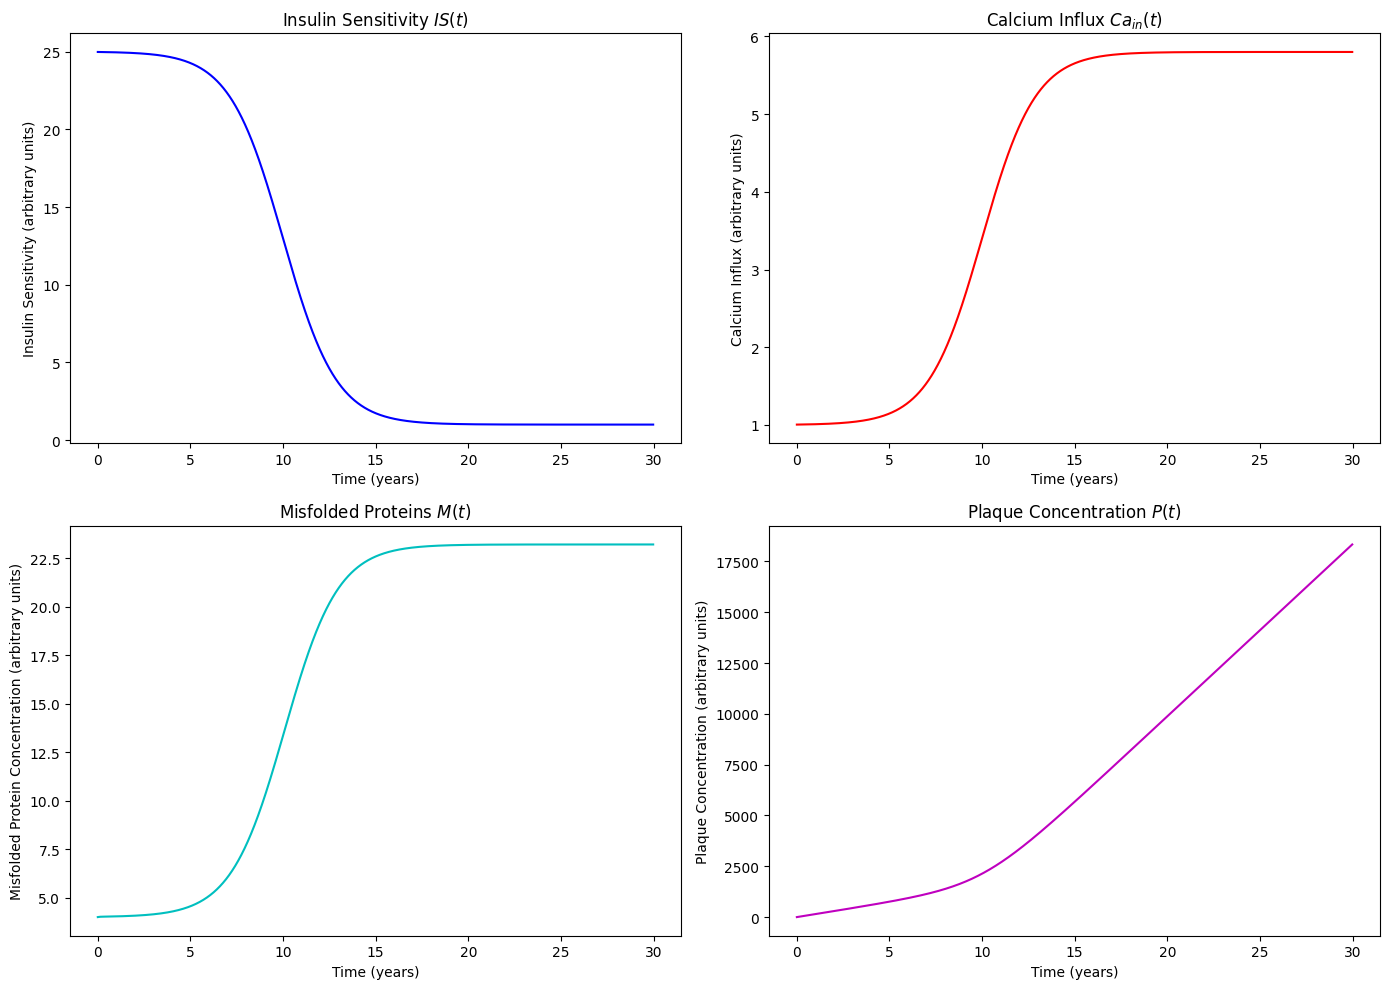

In [ ]:
# Plot the results
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(t_years, IS, 'b')
plt.title('Insulin Sensitivity $IS(t)$')
plt.xlabel('Time (years)')
plt.ylabel('Insulin Sensitivity (arbitrary units)')

plt.subplot(2, 2, 2)
plt.plot(t_years, Ca_in, 'r')
plt.title('Calcium Influx $Ca_{in}(t)$')
plt.xlabel('Time (years)')
plt.ylabel('Calcium Influx (arbitrary units)')

# plt.subplot(2, 3, 3)
# plt.plot(t_years, ROS, 'g')
# plt.title('Reactive Oxygen Species $ROS(t)$')
# plt.xlabel('Time (years)')
# plt.ylabel('ROS Level (arbitrary units)')

plt.subplot(2, 2, 3)
plt.plot(t_years, M, 'c')
plt.title('Misfolded Proteins $M(t)$')
plt.xlabel('Time (years)')
plt.ylabel('Misfolded Protein Concentration (arbitrary units)')

plt.subplot(2, 2, 4)
plt.plot(t_years, P, 'm')
plt.title('Plaque Concentration $P(t)$')
plt.xlabel('Time (years)')
plt.ylabel('Plaque Concentration (arbitrary units)')

plt.tight_layout()
plt.show()